# Data Analysis Project Steps
* Create a Problem statement.
* Identify the data you want to analyze.
* Explore and clean the data.
* Analyze the data to get useful insights.
* Present the data in terms of reports or dashboards using visualizations.

# Business Problem
In recent years, city hotels and resorts have seen high cancellation rates. Each hotel is now dealing with a number of issues as a results, including fewer revenues and less than ideal room use. Consequently, lowering rates is both hotel's primary goal in order to increase their efficiency in generating revenue and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as othet factors that have no bearing on their business and yearly revenue generation and yearly revenue generation are the main topics of this report.


# Assumptions
1. No unusual occurences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyse a hotel's possible plans in efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

# Research Question
1. What are the variables that effect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

# Hypothesis
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customer tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

In [48]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the datasets
df= pd.read_csv('datasets/hotel_bookings 2.csv')

In [7]:
# Exploratory Data Analysis and Data Cleaning
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [8]:
df.shape

(119390, 32)

In [9]:
# We need to check columns 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# we need to check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
# reservation_status_date is in object data type, need to change to date time
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [17]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [19]:
# we need to run for loop on, which is object types
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [20]:
# To check missing value
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
# Lets remove agent and company because it is null,axis =1 1 ( for columns)
df.drop(['company','company'],axis=1,inplace = True) # to drop row or column
df.dropna(inplace = True)# to remove row and column with missing value

In [22]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2016.156977,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,0.706117,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [23]:
# we can see adr 5000 is an outlier, need to remove it
df = df[df['adr']<5000]

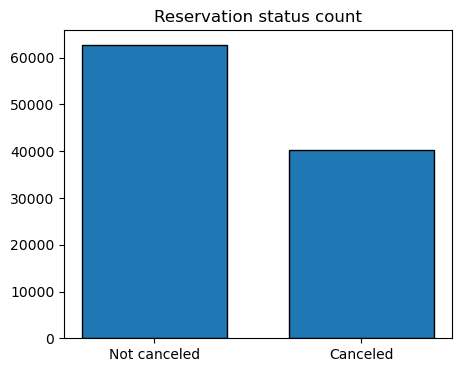

In [34]:
# Data analysis and visualizations
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor='k',width=0.7)
plt.show()

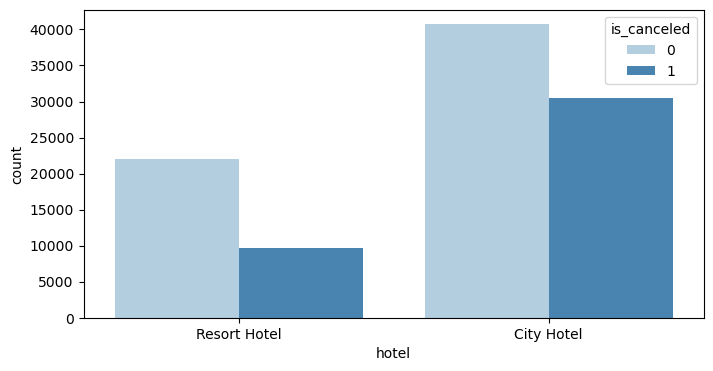

In [35]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x = 'hotel',hue='is_canceled', data= df,palette = 'Blues')

In [38]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.694636
1    0.305364
Name: is_canceled, dtype: float64

In [40]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.571846
1    0.428154
Name: is_canceled, dtype: float64

In [45]:
reort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city = city_hotel.groupby('reservation_status_date')[['adr']].mean()

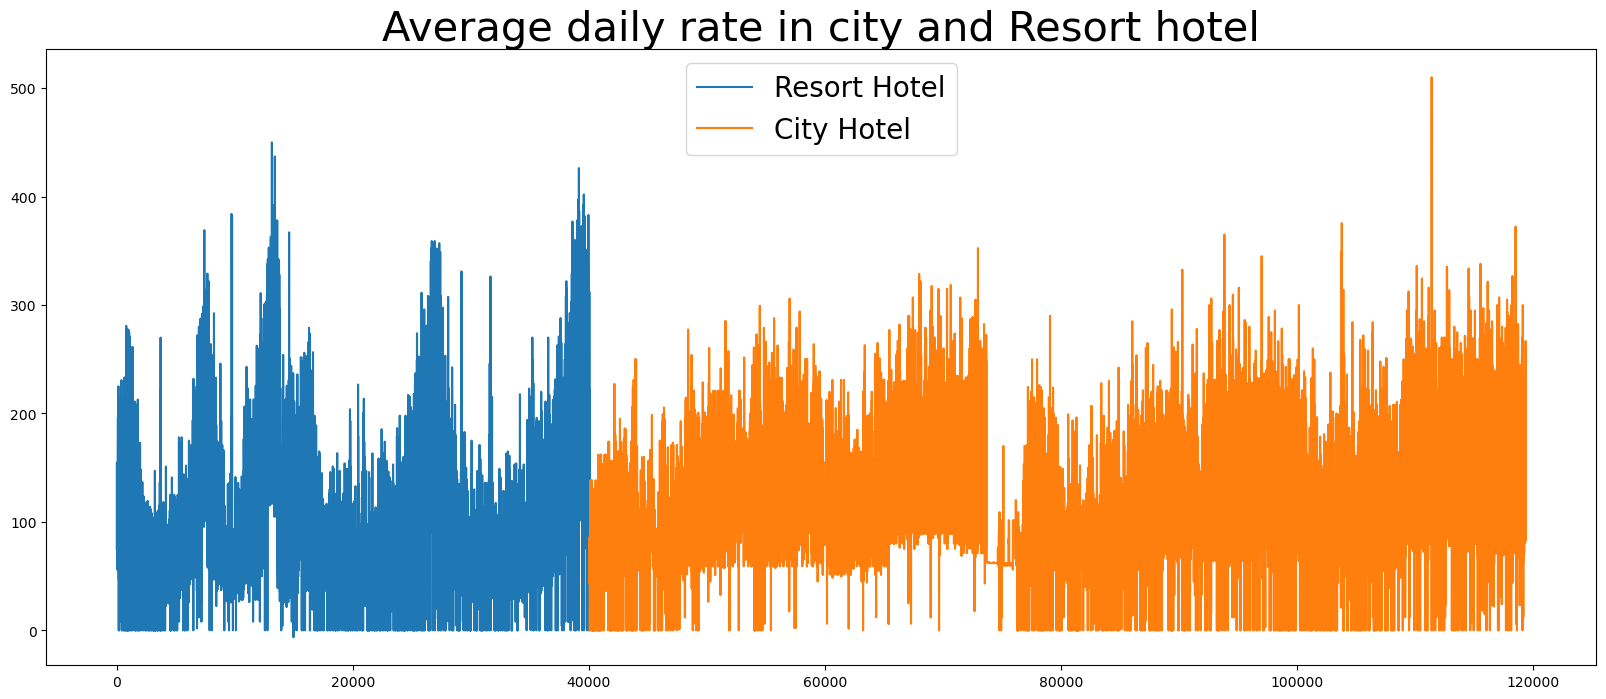

In [49]:
plt.figure(figsize= (20,8))
plt.title('Average daily rate in city and Resort hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label= 'City Hotel')
plt.legend(fontsize =20)
plt.show()

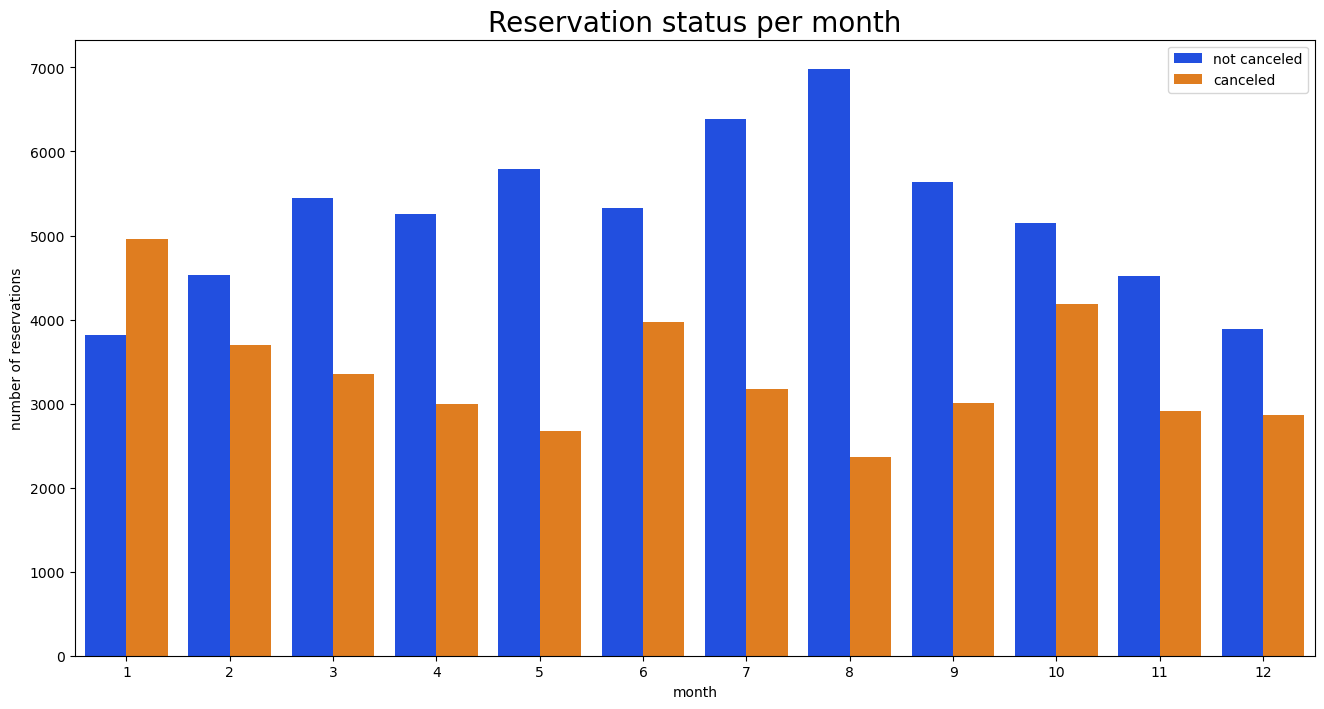

In [50]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x= 'month',hue= 'is_canceled',data= df, palette= 'bright')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()